In [5]:
# Check csv file path correct 
import os
def checkFile(filepath):
    if os.path.isfile(filepath):
        print("Got it!")
        return True
    else:
        print("It's not here!")
        return False

file_path = "../data/p3/data/temp/turn/driving_log.csv"
checkFile(file_path)

Got it!


True

In [39]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import glob
def csv2pickle(file_path):
    files = glob.glob(file_path + '*.csv')
    print(files)
    center = []
#     left = []
#     right = []
    steering = []
    throttle = []
    brake = []
    speed = []
    for i in range(len(files)):
        df = pd.read_csv(files[i])
        arr = pd.DataFrame.to_numpy(df)
        for i in range(len(arr)):
            file = '../data/p3/data/temp/turn/IMG/' + str(arr[i][0].split("/")[-1])
            center_img = plt.imread(file)
            center.append(np.asarray(center_img))
#             flipped = np.fliplr(center_img)
#             center.append(np.asarray(flipped)) # flipped

#             file = '../data/p3/data/IMG/' + str(arr[i][1].split("/")[-1]).strip()
#             left_img = plt.imread(file)
#             left.append(np.asarray(left_img))
#             left.append(np.asarray(left_img)) # flipped
            

#             file = '../data/p3/data/IMG/' + str(arr[i][2].split("/")[-1]).strip()
#             right_img = plt.imread(file)
#             right.append(np.asarray(right_img))
#             right.append(np.asarray(right_img)) #flipped
           
            steering.append(arr[i][3])
#             steering.append(-arr[i][3]) # flipped
            
#             throttle.append(arr[i][4])
#             throttle.append(arr[i][4]) # flipped
            
#             brake.append(arr[i][5])
#             brake.append(arr[i][5]) # flipped
            
            speed.append(arr[i][6])
            speed.append(arr[i][6]) # flipped
    
    data = {
    'center': np.array(center),
#     'left': np.array(left),
#     'right': np.array(right),
    "steering": np.array(steering),
#     "throttle": np.array(throttle),
#     "brake": np.array(brake),
    "speed": np.array(speed)
    }
    print("start dumping")
    pickle.dump(data, open("../data/p3/data/train_turn_left.p", "wb"))
    if os.path.isfile("../data/p3/data/train_turn_left.p"):
        print("pickle saved!")
    else:
        print("Something's wrong!")
    
csv2pickle("../data/p3/data/temp/turn/")

['../data/p3/data/temp/turn/driving_log.csv']
start dumping
pickle saved!


In [42]:
# Parse data
import pickle
import numpy as np
with open('../data/p3/data/train_turn_left.p', mode='rb') as f:
    data = pickle.load(f)

X_train, y_train = data['center'], data['steering']

In [43]:
X_train.shape

(5516, 160, 320, 3)

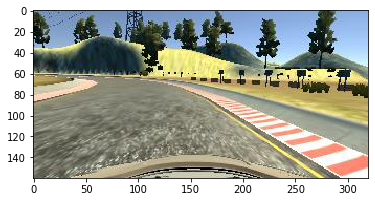

In [35]:
img = data["center"][0]
flipped = np.fliplr(img)
plt.imshow(flipped)